In [106]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [107]:
data_df = pd.read_csv("diamonds.csv")
data_df.sample(20)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
32838,32839,0.46,Ideal,G,SI2,61.1,57.0,807,4.97,5.01,3.05
29389,29390,0.31,Very Good,E,SI1,63.1,57.0,698,4.31,4.28,2.71
35211,35212,0.33,Ideal,I,IF,61.4,56.0,891,4.45,4.41,2.72
1618,1619,0.81,Ideal,E,SI2,61.8,56.0,3013,6.00,5.97,3.70
33684,33685,0.40,Very Good,E,SI1,62.2,54.4,837,4.72,4.76,2.95
21474,21475,1.32,Ideal,H,VVS1,62.1,55.0,9572,6.98,7.03,4.35
5518,5519,1.00,Good,H,SI2,63.4,61.0,3850,6.29,6.33,4.00
31701,31702,0.36,Premium,F,SI1,61.1,59.0,770,4.59,4.55,2.79
982,983,0.70,Ideal,G,VVS2,62.1,53.0,2895,5.71,5.75,3.56
4357,4358,0.83,Very Good,F,VS1,63.3,56.0,3603,5.99,5.92,3.77


In [108]:
data_df.shape

(53940, 11)

Definition of Variables

* **carat (0.2-5.01):** The carat is the diamond’s physical weight measured in metric carats. One carat equals 0.20 gram and is subdivided into 100 points.
* **cut (Fair, Good, Very Good, Premium, Ideal):** The quality of the cut. The more precise the diamond is cut, the more captivating the diamond is to the eye thus of high grade.
* **color (from J (worst) to D (best)):** The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.
* **clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)):** Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.
* **depth (43-79)**: It is the total depth percentage which equals to z / mean(x, y) = 2 * z / (x + y). The depth of the diamond is its height (in millimetres) measured from the culet (bottom tip) to the table (flat, top surface) as referred in the labelled diagram above.
* **table (43-95):** It is the width of the top of the diamond relative to widest point. It gives diamond stunning fire and brilliance by reflecting lights to all directions which when seen by an observer, seems lustrous.
* **price ($$326 - $18826):** It is the price of the diamond in US dollars. **It is our very target column in the dataset.**
* **x (0 - 10.74):** Length of the diamond (in mm)
* **y (0 - 58.9):** Width of the diamond (in mm)
* **z (0 - 31.8):** Depth of the diamond (in mm)

Checking for missing values & categorical variables






In [109]:
# Checking for missing values and categorical variables in the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [110]:
#Similar with the code above (during the data course, we used this one)
data_df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [111]:
#There is no missing data. So, we don't fill any blanks.
data_df.isnull().sum().sum()

0

Evaluating categorical features


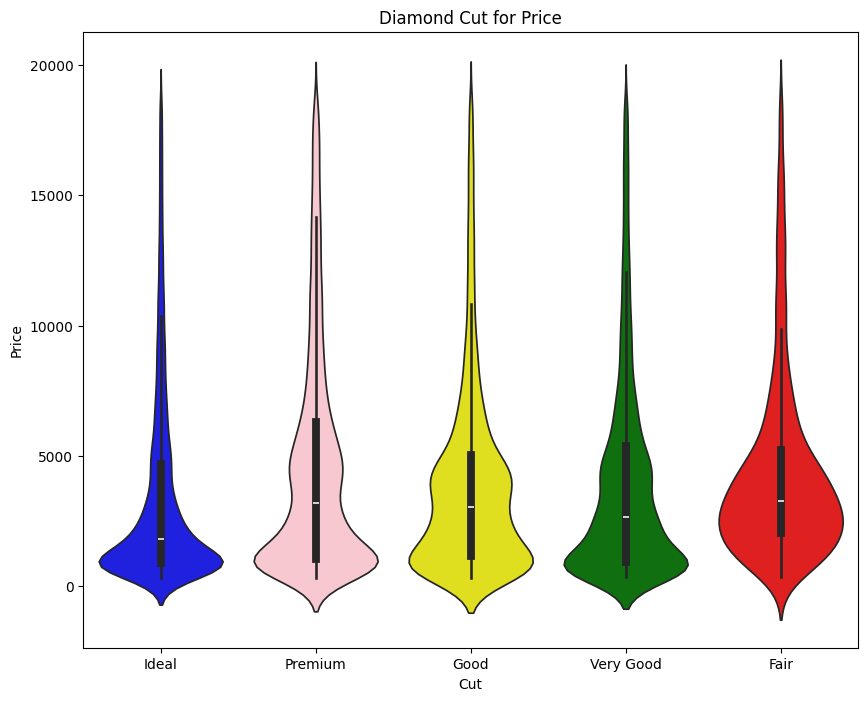

In [112]:
plt.figure(figsize=(10,8))
cols = ['blue','pink','yellow','green','red']
ax = sns.violinplot(x="cut",y="price", data=data_df, palette=cols,scale= "count")
ax.set_title("Diamond Cut for Price")
ax.set_ylabel("Price")
ax.set_xlabel("Cut")
plt.show()

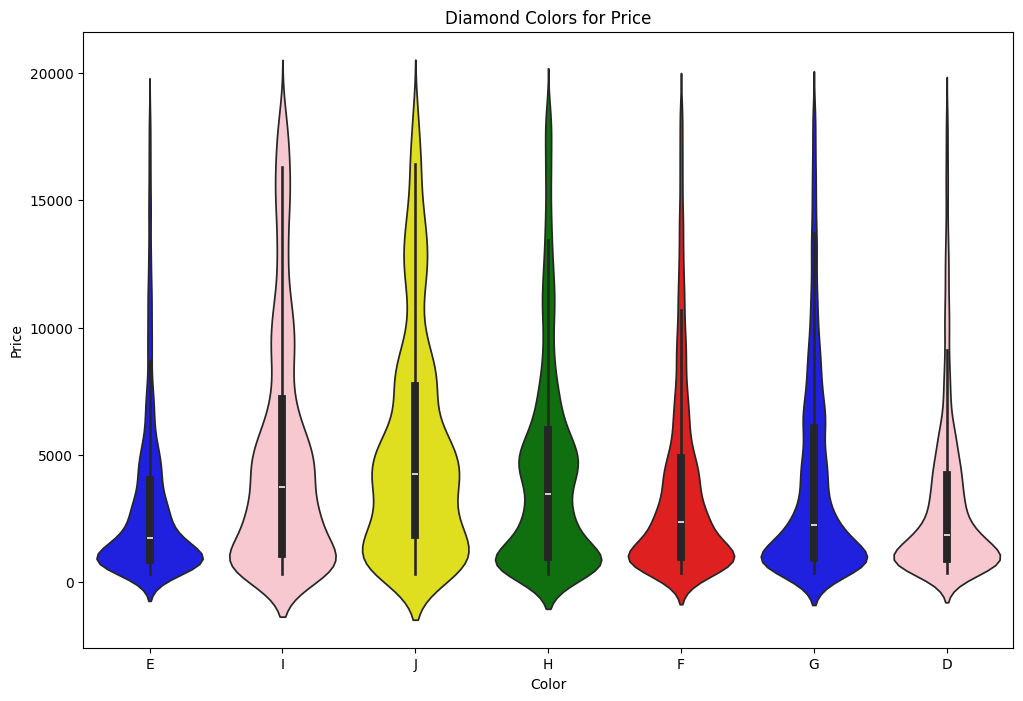

In [113]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="color",y="price", data=data_df, palette=cols,scale= "count")
ax.set_title("Diamond Colors for Price")
ax.set_ylabel("Price")
ax.set_xlabel("Color")
plt.show()

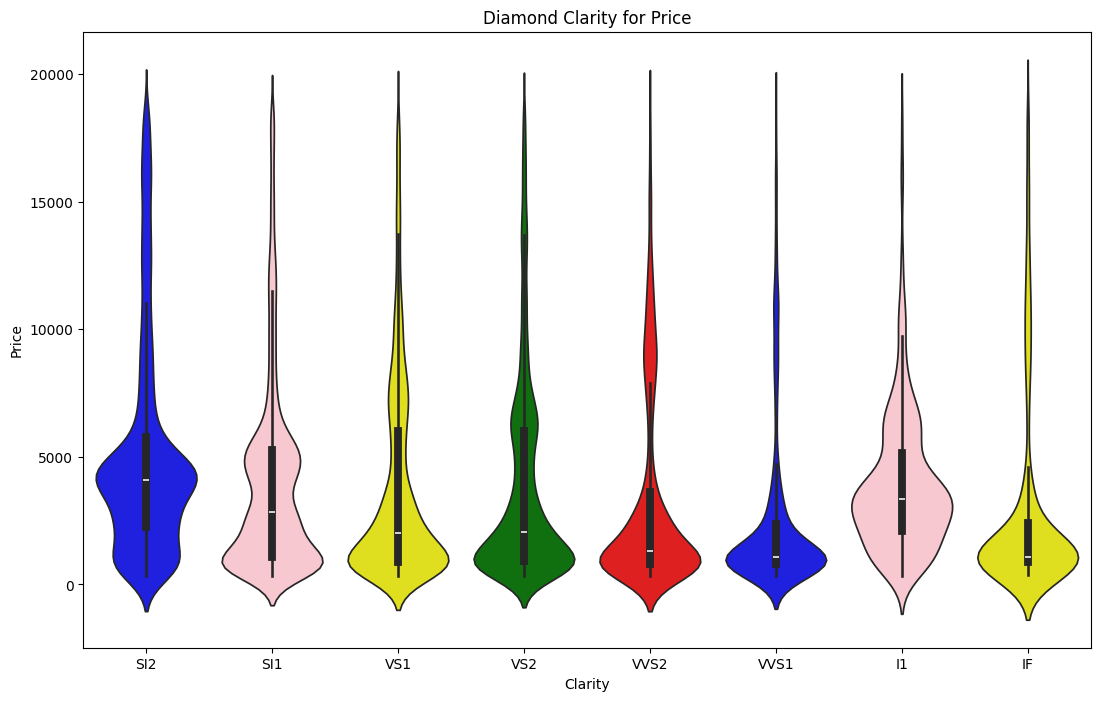

In [114]:
plt.figure(figsize=(13,8))
ax = sns.violinplot(x="clarity",y="price", data=data_df, palette=cols,scale= "count")
ax.set_title("Diamond Clarity for Price")
ax.set_ylabel("Price")
ax.set_xlabel("Clarity")
plt.show()

In [115]:
#Summary of the data
data_df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


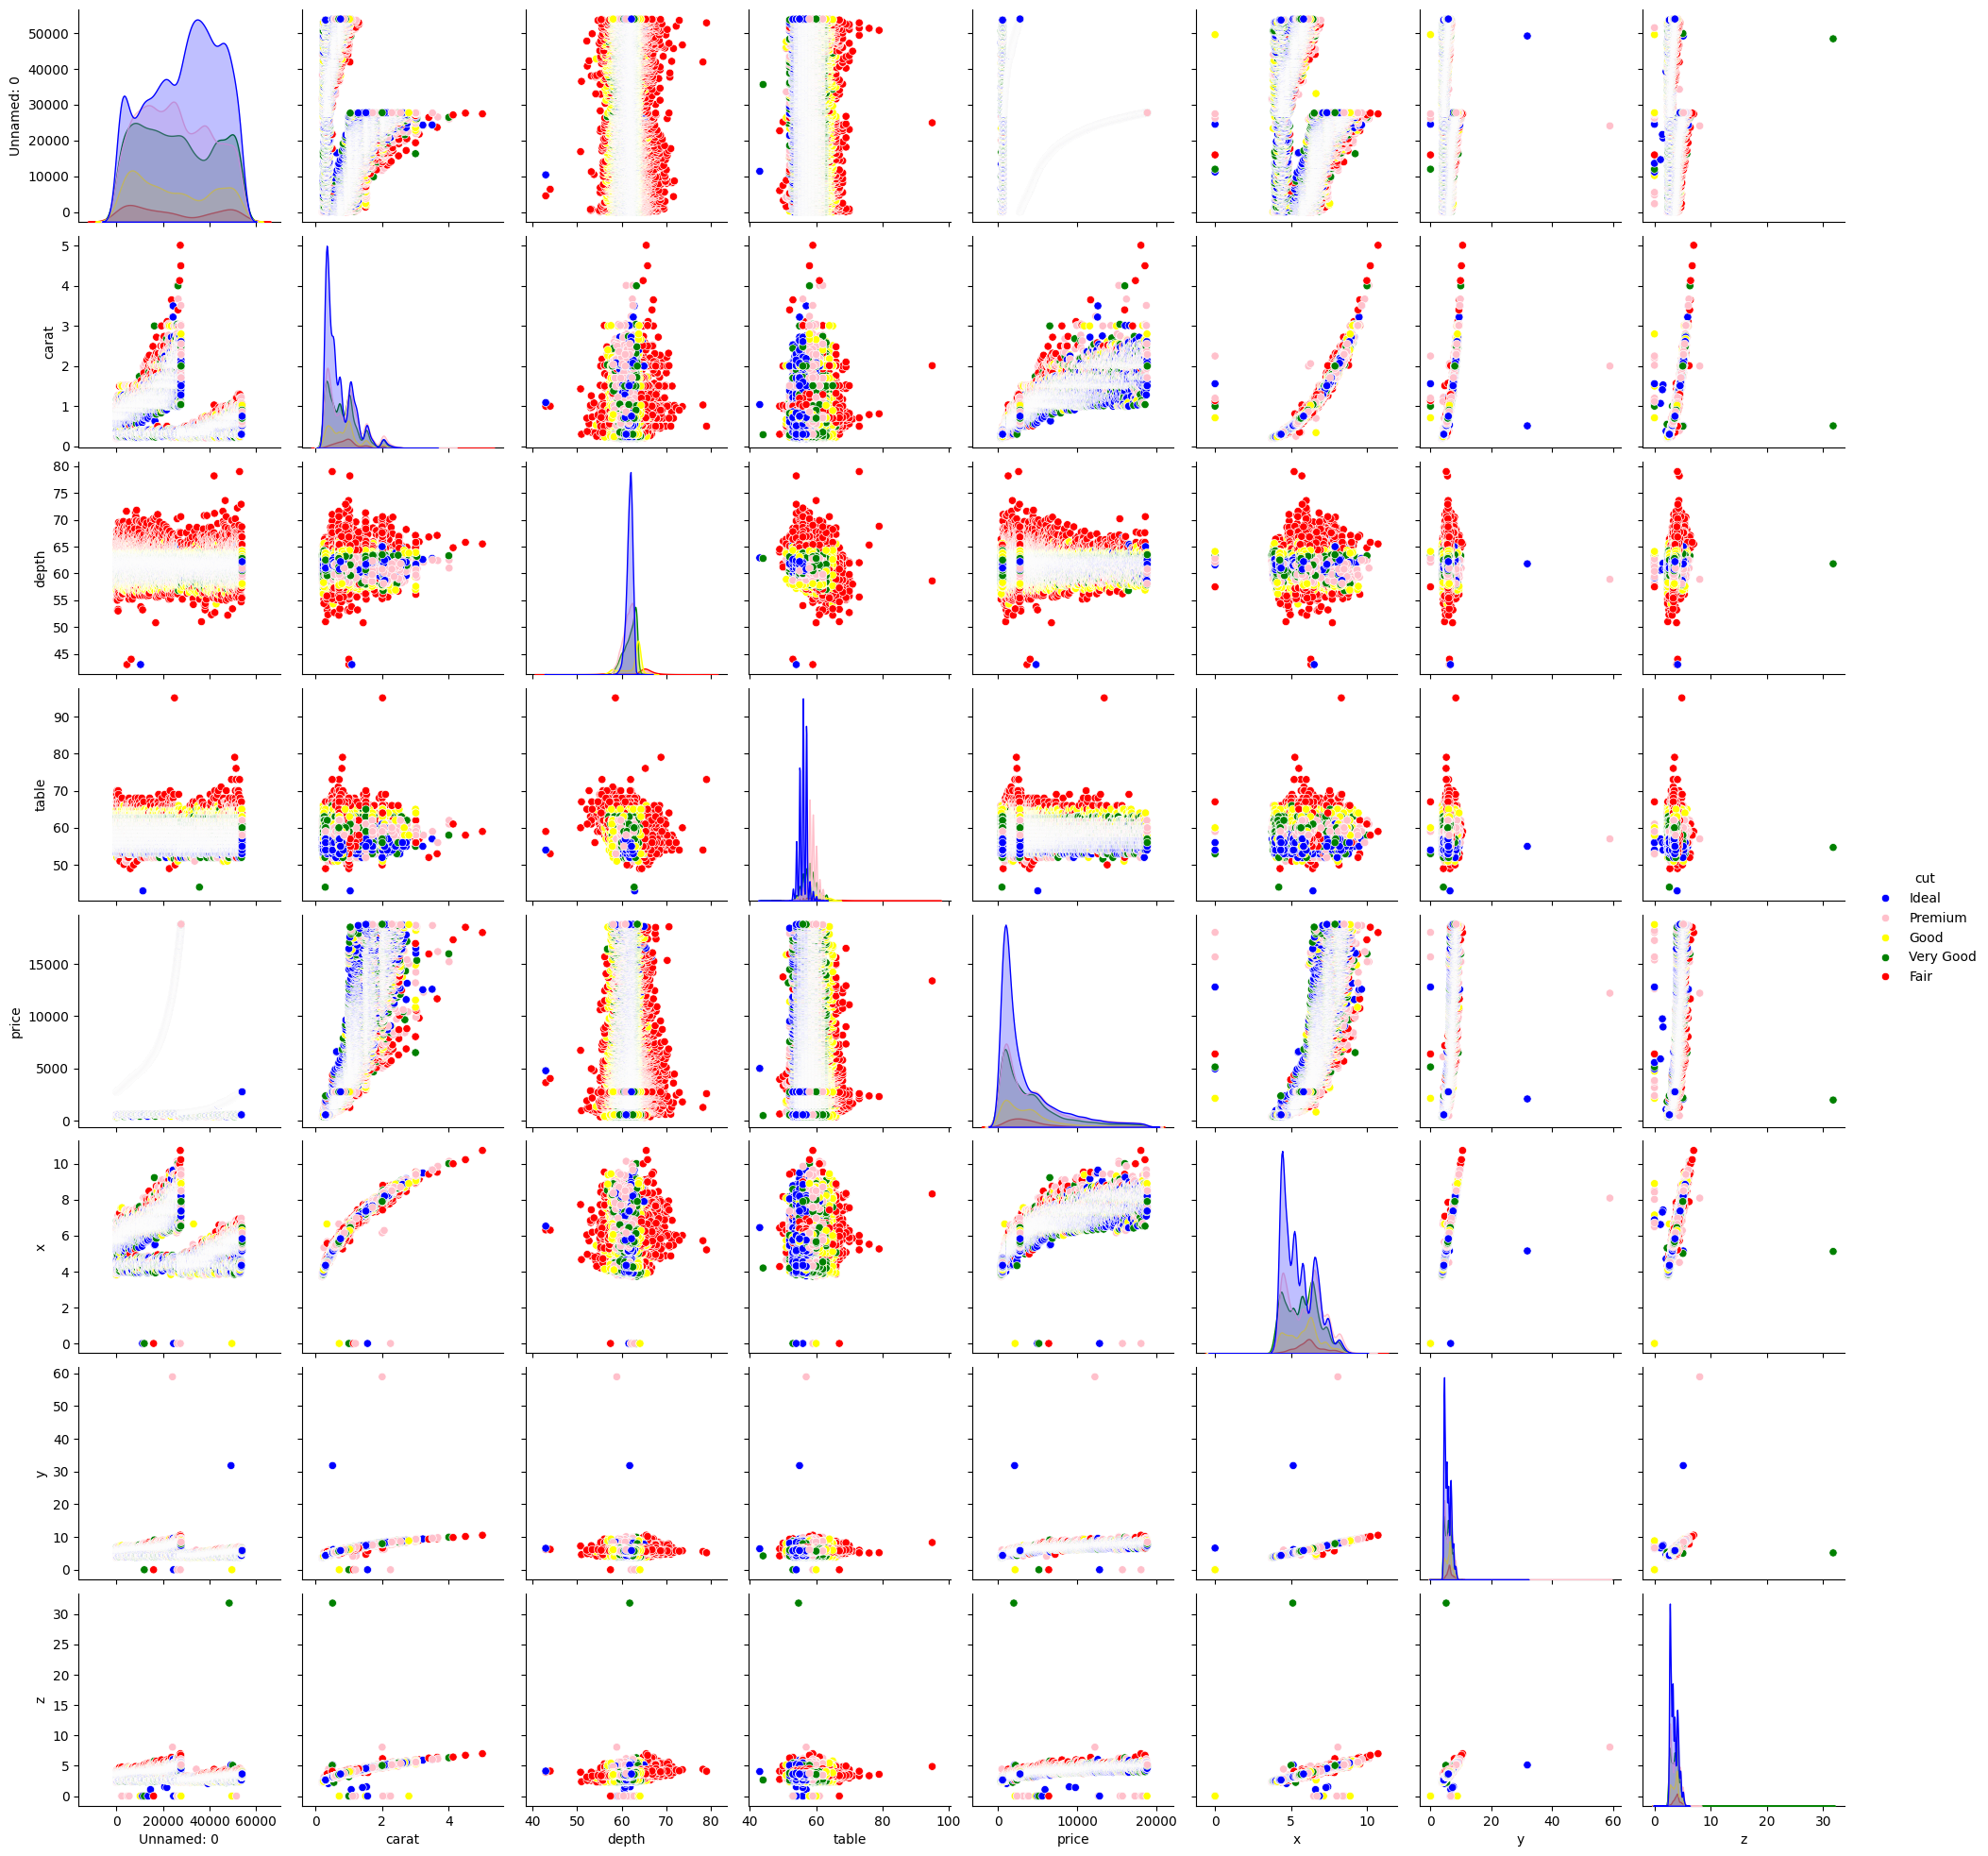

In [116]:
#Studying two things at once using pairplot to see how they're related.
ax = sns.pairplot(data_df, hue= "cut", palette = cols)

Checking for Potential Outliers




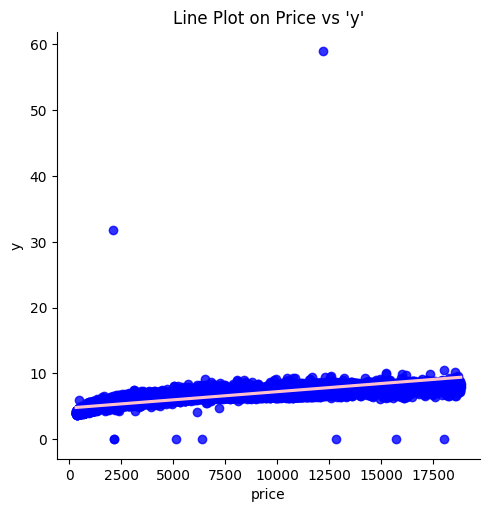

In [117]:
lm = sns.lmplot(x="price", y="y", data=data_df, scatter_kws={"color": 'blue'}, line_kws={"color": 'pink'})
plt.title("Line Plot on Price vs 'y'")
plt.show()

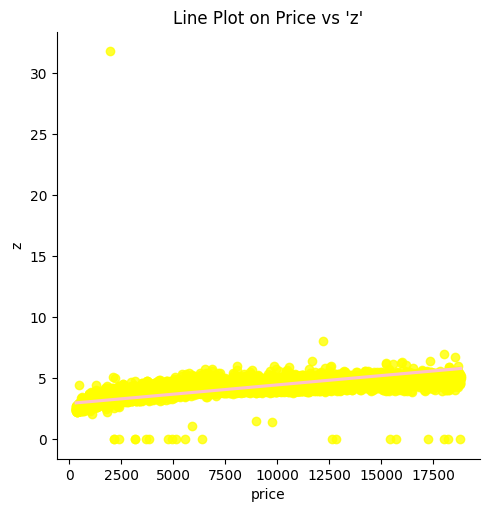

In [118]:
lm = sns.lmplot(x="price", y="z", data=data_df, scatter_kws={"color": 'yellow'}, line_kws={"color": 'pink'})
plt.title("Line Plot on Price vs 'z'")
plt.show()

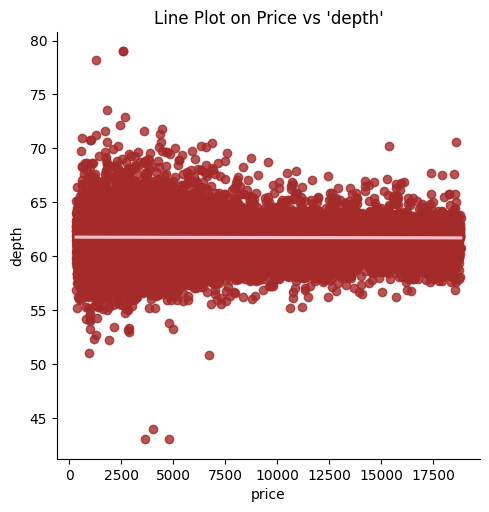

In [119]:
lm = sns.lmplot(x="price", y="depth", data=data_df, scatter_kws={"color": 'brown'}, line_kws={"color": 'pink'})
plt.title("Line Plot on Price vs 'depth'")
plt.show()

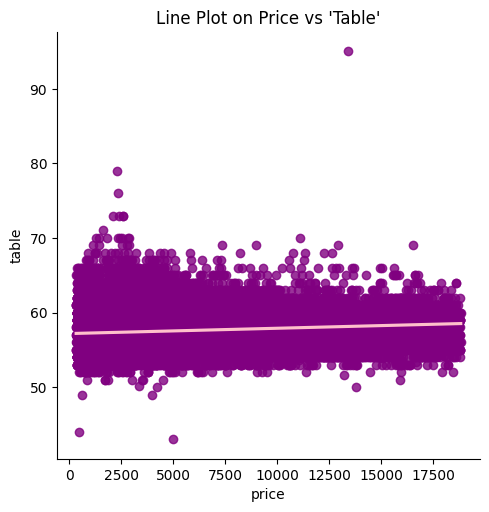

In [120]:
lm = sns.lmplot(x="price", y="table", data=data_df, scatter_kws={"color":'purple'}, line_kws={"color": 'pink'})
plt.title("Line Plot on Price vs 'Table'")
plt.show()

### **<span style="color:#682F2F;"><center>Data Cleaning</center></span>**

In [121]:
# Removing the "Unnamed" column
data_df = data_df.drop(["Unnamed: 0"], axis=1)
data_df.shape

(53940, 10)

In [122]:
# Removing the datapoints having min 0 value in x, y or z features
data_df = data_df.drop(data_df[data_df["x"]==0].index)
data_df = data_df.drop(data_df[data_df["y"]==0].index)
data_df = data_df.drop(data_df[data_df["z"]==0].index)
data_df.shape

(53920, 10)


Removing Outliers

In [123]:
# Dropping the outliers (since we have huge dataset) by defining appropriate measures across features

data_df = data_df[(data_df["depth"]<75)&(data_df["depth"]>45)]
data_df = data_df[(data_df["table"]<80)&(data_df["table"]>40)]
data_df = data_df[(data_df["x"]<40)]
data_df = data_df[(data_df["y"]<40)]
data_df = data_df[(data_df["z"]<40)&(data_df["z"]>2)]
data_df.shape

(53909, 10)

Encoding Variables




In [124]:
# Making a copy to keep original data
data1 = data_df.copy()

# Applying label encoder to columns with categorical data
columns = ['cut','color','clarity']
label_encoder = LabelEncoder()
for col in columns:
    data1[col] = label_encoder.fit_transform(data1[col])
data1.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000
mean,0.797617,2.553396,2.593964,3.835575,61.749743,57.455852,3930.513680,5.731441,5.733764,3.539994
std,0.473759,1.027444,1.701283,1.724540,1.420093,2.226169,3987.145802,1.119369,1.116891,0.702085
min,0.200000,0.000000,0.000000,0.000000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,73.600000,79.000000,18823.000000,10.740000,31.800000,31.800000


<Axes: >

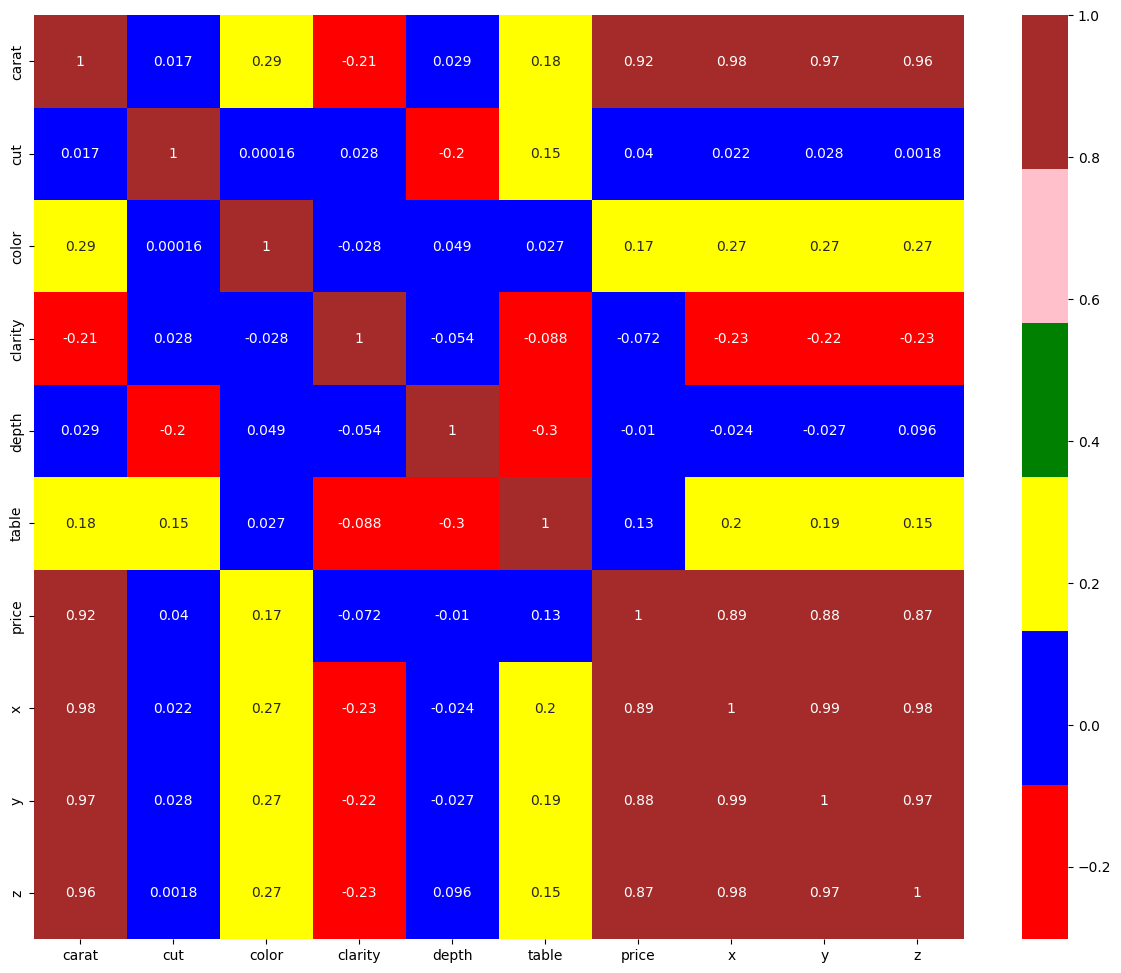

In [125]:
# Examining correlation matrix using heatmap
cmap = sns.diverging_palette(205, 133, 63, as_cmap=True)
cols = (['red', 'blue', 'yellow', 'green', 'pink', 'brown'])
corrmat= data1.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmat,cmap=cols,annot=True)

Regression Models


In [126]:
# Defining X and y variables
X= data1.drop(["price"],axis =1)
y= data1["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=25)

In [127]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr",LinearRegression())])

pipeline_lasso=Pipeline([("scalar2", StandardScaler()),
                      ("lasso",Lasso())])

pipeline_dt=Pipeline([("scalar3",StandardScaler()),
                     ("dt",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar4",StandardScaler()),
                     ("rf",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar5",StandardScaler()),
                     ("kn",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar6",StandardScaler()),
                     ("xgb",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_lasso, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipeline_dict = {0: "LinearRegression", 1: "Lasso", 2: "DecisionTree", 3: "RandomForest",4: "KNeighbors", 5: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [128]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=12)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipeline_dict[i], -1 * cv_score.mean()))

LinearRegression: 1383.854012 
Lasso: 1366.991298 
DecisionTree: 735.965918 
RandomForest: 548.378271 
KNeighbors: 816.558280 
XGBRegressor: 548.346850 


In [132]:
print("Linear Regression")
pred = pipeline_lr.predict(X_test)
print("R^2",metrics.r2_score(y_test, pred))
print("MSE",metrics.mean_squared_error(y_test, pred))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Linear Regression
R^2 0.8918175750712664
MSE 1743751.9798097394
MAE: 850.3551552198746
Adjusted R^2: 0.8917271887154959


In [133]:
print("Lasso")
pred = pipeline_lasso.predict(X_test)
print("R^2",metrics.r2_score(y_test, pred))
print("MSE",metrics.mean_squared_error(y_test, pred))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Lasso
R^2 0.8917363606495698
MSE 1745061.0446482813
MAE: 851.4818811550141
Adjusted R^2: 0.8916459064391954


In [134]:
print("Decision Tree Regressor")
pred = pipeline_dt.predict(X_test)
print("R^2",metrics.r2_score(y_test, pred))
print("MSE",metrics.mean_squared_error(y_test, pred))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Decision Tree Regressor
R^2 0.9659088545448035
MSE 549502.4022676683
MAE: 360.71818772027456
Adjusted R^2: 0.9658803714117644


In [135]:
print("Random Forest Regressor")
pred = pipeline_rf.predict(X_test)
print("R^2",metrics.r2_score(y_test, pred))
print("MSE",metrics.mean_squared_error(y_test, pred))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Random Forest Regressor
R^2 0.9815641099098715
MSE 297161.20585570065
MAE: 268.4543924729046
Adjusted R^2: 0.98154870673397


In [136]:
print("K-Neighbor Regressor")
pred = pipeline_kn.predict(X_test)
print("R^2",metrics.r2_score(y_test, pred))
print("MSE",metrics.mean_squared_error(y_test, pred))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

K-Neighbor Regressor
R^2 0.9608073251850461
MSE 631732.0428677426
MAE: 411.51617510665926
Adjusted R^2: 0.9607745797270685


In [137]:
print("Model prediction on test data with XGBClassifier which gave us the least RMSE")
pred = pipeline_xgb.predict(X_test)
print("R^2",metrics.r2_score(y_test, pred))
print("MSE",metrics.mean_squared_error(y_test, pred))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Model prediction on test data with XGBClassifier which gave us the least RMSE
R^2 0.9821291192884176
MSE 288054.03134838294
MAE: 275.68882095232186
Adjusted R^2: 0.9821141881775372
